# Please don't edit directly in this document. Create your own copy first.#

# Exercise: Canadian National Digital Heritage Index

# [Web Scraping]

## 1. R environment in the Jupyter Notebook environment 

First, you need load R in this environment to run R codes.

In [0]:
# Load R
%reload_ext rpy2.ipython
%config IPCompleter.greedy=True
%config InlineBackend.figure_format = 'retina'

## 2. Install and import R packages

*   [Rcrawler](https://cran.r-project.org/web/packages/Rcrawler/index.html): R package for web crawling and web scraping
*   [data.table](https://cran.r-project.org/web/packages/data.table/index.html): R pacakge for large data manipulation



In [0]:
# indicate that you're running R code
%%R

# Install if it's your first time to run
install.packages("Rcrawler") 
install.packages("data.table") 

# Load
library(Rcrawler) 
library(data.table)

/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: also installing the dependencies ‘png’, ‘iterators’, ‘debugme’, ‘showimage’, ‘data.table’, ‘foreach’, ‘doParallel’, ‘webdriver’


  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: trying URL 'https://cran.rstudio.com/src/contrib/png_0.1-7.tar.gz'

  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Content type 'application/x-gzip'
  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning:  length 24990 bytes (24 KB)

  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.6/dist-p

## 3. Set the URLs

In [0]:
# indicate that you're running R code
%%R

# URL list from https://www.cndhi-ipnpc.ca/en?&page=0 to https://www.cndhi-ipnpc.ca/en?&page=151

x <- 0:2

urllist <- lapply(x, function(x){
  index_url <-paste("https://www.cndhi-ipnpc.ca/en?&page=",x,"/",sep='');
  return(index_url)
})

urllist

[[1]]
[1] "https://www.cndhi-ipnpc.ca/en?&page=0/"

[[2]]
[1] "https://www.cndhi-ipnpc.ca/en?&page=1/"

[[3]]
[1] "https://www.cndhi-ipnpc.ca/en?&page=2/"



## 4. Extract data elements from the URL list

In [0]:
# indicate that you're running R code
%%R

# Extract elements from the url using Xpath for title, institution, keywords

DATA_index_multiple<-ContentScraper(Url = urllist,
XpathPatterns=c("//div[@class='collection--title']/a/text()","//div[@class='collection--institution']", "//div[@class='collection-keywords']"), PatternsName=c("title", "institution", "keywords"), ManyPerPattern=TRUE)

# Return a list

DATA_index_multiple

1..2..3..[[1]]
[[1]]$title
 [1] "Early Modern Maritime Recipes"             
 [2] "Oeuvres d’art public de l’Université Laval"
 [3] "Théâtre à Montréal, 1825-1930"             
 [4] "50 Years of Expo 67"                       
 [5] "Olympic Torch Relay"                       
 [6] "Cartes anciennes de l'Arctique"            
 [7] "Images en art et architecture du Québec"   
 [8] "Images du Nord et de l’Arctique"           
 [9] "The Canadian Jazz Archive Online"          
[10] "John H. Warkentin"                         

[[1]]$institution
 [1] "University of New Brunswick and Dalhousie University"
 [2] "Bibliothèque de l'Université Laval\n"                
 [3] "Bibliothèque et Archives nationales du Québec"       
 [4] "Library and Archives Canada"                         
 [5] "City of Vancouver Archives"                          
 [6] "Bibliothèque de l'Université Laval\n"                
 [7] "Bibliothèque de l'Université Laval\n"                
 [8] "Bibliothèque de l'Université

# Save in the dataframe using rbindlist from data.table

In [0]:
# indicate that you're running R code
%%R

# Convert list to the dataframe

df_index_multiple <- rbindlist(DATA_index_multiple)
df_index_multiple

                                                title
   1:                   Early Modern Maritime Recipes
   2:      Oeuvres d’art public de l’Université Laval
   3:                   Théâtre à Montréal, 1825-1930
   4:                             50 Years of Expo 67
   5:                             Olympic Torch Relay
  ---                                                
1509:                     Notable Works & Collections
1510:                        Brown and Gold Yearbooks
1511:                      Harrison Flint Lewis Fonds
1512:                             The Island Magazine
1513: Historical Topographic Map Digitization Project
                                               institution
   1: University of New Brunswick and Dalhousie University
   2:                 Bibliothèque de l'Université Laval\n
   3:        Bibliothèque et Archives nationales du Québec
   4:                          Library and Archives Canada
   5:                           City of Vancouver Archive

# Export to CSV

Import neccesary libraries. The file will be saved in the virtual machine, so in order to download a csv file to your local computer, you need to import *files* from google.colab. 

## 1. Libraries

*   [csv](https://docs.python.org/3/library/csv.html): the most common import and export format for spreadsheets and databases.

In [0]:
# import
import csv
from google.colab import files

In [0]:
# indicate that you're running R code
%%R

# Save dataframe to CSV
write.csv(df_index_multiple, "CanadianDigital.csv", fileEncoding="UTF-8")

In [0]:
# Download the file to your computer
files.download("CanadianDigital.csv")

# Data Wrangling

Sometimes, the data you scraped from the website are not organized in a way you wanted, so you may need to tidy your datasets.

*   [tidyr](https://https://cran.r-project.org/web/packages/tidyr/index.html): tools to tidy your data
*   [magrittr](https://cran.r-project.org/web/packages/magrittr/index.html): pipe operator %>%
*   [dplyr](https://https://cran.r-project.org/web/packages/dplyr/dplyr.pdf): tools for data manipulation

In [0]:
# indicate that you're running R code
%%R

# install
install.packages('tidyr')
install.packages('magrittr')
install.packages('dplyr')

# import
library('tidyr')
library('magrittr')
library('dplyr')

/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: 
Attaching package: ‘magrittr’


  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: The following object is masked from ‘package:tidyr’:

    extract


  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: 
Attaching package: ‘dplyr’


  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: The following objects are masked from ‘package:data.table’:

    between, first, last


  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: The following objects are masked from ‘package:stats’:

    filter, lag


  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWa

In [0]:
# indicate that you're running R code
%%R

# separate one column (keywords) into several

df_index_multiple_1 <- df_index_multiple %>% tidyr::separate(keywords, c("K1", "K2", "K3", "K4", "K5"), sep=", ")
df_index_multiple_1

                                                title
   1:                   Early Modern Maritime Recipes
   2:      Oeuvres d’art public de l’Université Laval
   3:                   Théâtre à Montréal, 1825-1930
   4:                             50 Years of Expo 67
   5:                             Olympic Torch Relay
  ---                                                
1509:                     Notable Works & Collections
1510:                        Brown and Gold Yearbooks
1511:                      Harrison Flint Lewis Fonds
1512:                             The Island Magazine
1513: Historical Topographic Map Digitization Project
                                               institution                   K1
   1: University of New Brunswick and Dalhousie University                 Food
   2:                 Bibliothèque de l'Université Laval\n          Visual arts
   3:        Bibliothèque et Archives nationales du Québec              Theatre
   4:                          L

In [0]:
# indicate that you're running R code
%%R

# count from dplyr
institutions <- df_index_multiple_1 %>% count(institution) 

# sort
institutions[order(-institutions$n), ]

# A tibble: 246 x 2
   institution                                      n
   <chr>                                        <int>
 1 Royal British Columbia Museum                  147
 2 "Memorial University of Newfoundland\n"        111
 3 Library and Archives Canada                     97
 4 University of Manitoba                          91
 5 "Acadia University\n"                           56
 6 University of British Columbia                  56
 7 University of Alberta                           53
 8 University of Saskatchewan                      44
 9 "Multicultural History Society of Ontario\n"    35
10 Simon Fraser University                         35
# … with 236 more rows


# Data visualization (word cloud)



In [0]:
# indicate that you're running R code
%%R

# Install
install.packages("tm")  # for text mining
install.packages("wordcloud")# word-cloud generator 
install.packages("RColorBrewer") # color palettes

# Load
library("tm")
library("wordcloud")
library("RColorBrewer")

In [0]:
# indicate that you're running R code
%%R

## The codes below came from Céline Van den Rul: https://towardsdatascience.com/create-a-word-cloud-with-r-bde3e7422e8
# Create a vector 
text <- as.vector(as.matrix(df_index_multiple_1[, c("K1", "K2", "K3", "K4", "K5")]))
text

# Remove NA value
text <- na.omit(text)
text

## The codes below came from Céline Van den Rul: https://towardsdatascience.com/create-a-word-cloud-with-r-bde3e7422e8
# Create a corpus
docs <- Corpus(VectorSource(text))
docs

<<SimpleCorpus>>
Metadata:  corpus specific: 1, document level (indexed): 0
Content:  documents: 3406


In [0]:
# indicate that you're running R code
%%R

## The codes below came from Céline Van den Rul: https://towardsdatascience.com/create-a-word-cloud-with-r-bde3e7422e8
# create a document-term-matrix
dtm <- TermDocumentMatrix(docs) 
matrix <- as.matrix(dtm) 
words <- sort(rowSums(matrix),decreasing=TRUE) 
df_words <- data.frame(word = names(words),freq=words)
df_words

                               word freq
history                     history  337
local                         local  337
british                     british  272
columbia                   columbia  272
education                 education  210
aboriginal               aboriginal  151
peoples                     peoples  151
arts                           arts  131
visual                       visual  131
and                             and  124
labrador                   labrador  124
newfoundland           newfoundland  124
nova                           nova  105
scotia                       scotia  105
ontario                     ontario   97
religion                   religion   93
manitoba                   manitoba   92
europe                       europe   85
quebec                       quebec   81
alberta                     alberta   80
immigration             immigration   76
architecture           architecture   72
miscellany               miscellany   65
saskatchewan    

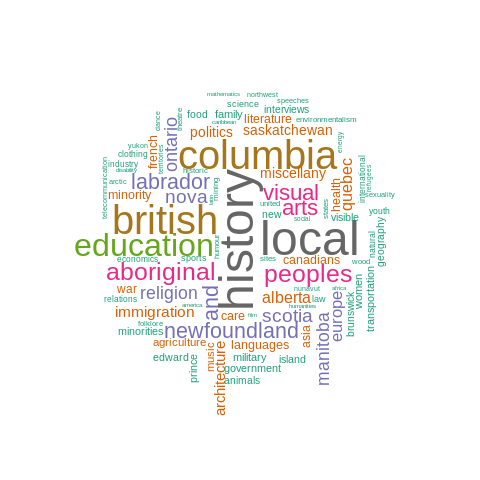

In [0]:
# indicate that you're running R code
%%R

# wordcloud
wordcloud(words = df_words$word, freq = df_words$freq, min.freq = 1, max.words=200, random.order=FALSE, rot.per=0.35, colors=brewer.pal(8, "Dark2"))